## Network Science Lab 2

In [17]:
#Run this cell 1st to import numpy, matplotlib, and networkx
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


### Task 1: Connected components

In this task, you will develop code to find the connected components in a graph.
Recall that a connected component of a graph is a set of nodes where there is at least one path between any pair of nodes in the set. A graph may contain several connected components, and the aim of this task is to assign a distinct numerical label to all nodes belonging to the same component. So, if a graph with 5 nodes has links: 0-1, 1-2, 3-4, then nodes 0,1,2 would be labeled belonging to component "0" and nodes 3,4 would be assigned to component "1". 

The basic algorithm is as follows:

* Initialize numerical labels to -1
* Loop through all nodes in graph
* if current node has not been explored
  * Assign numerical label to current node and label it as explored
  * Find all nodes reachable from current node, label them as explored and assign numerical label to them
  * Increment numerical label



1. Implement this algorithm in the cell below so that *connect* takes a networkx graph as input and creates a list, Lconnect, where Lconnect[i] is the label for the connected component that node i belongs to. You may assume that nodes have 
been numbered from 0 to N-1. You have been provided with a function that implements breadth-first search, and it may be helpful to create a copy of this function which can then be modified and called by *connect*

In [46]:
def bfs(G,s):
    """
    Input:
    G: networkx graph
    s: source node
    Find reachable nodes using BFS
    Output:
    L2: Labels for all nodes in graph, 0=unreachable from source, 1=reachable
    """

    L1 = list(G.nodes) #Assumes nodes are numbered from 0 to N-1
    L2 = [0 for l in L1]

    Q=[]
    Q.append(s)
    L2[s]=1

    while len(Q)>0:
        x = Q.pop(0)
        for v in G.adj[x].keys():
            if L2[v]==0:
                Q.append(v)
                L2[v]=1
            #print("v=",v)
            #print("Q=",Q)
    return L2

def connect(G):
    """Find connected components of G and label nodes appropriately
    in list, Lconnect.
    """
    depth = 1000
    components = []
    queue = n = list(G.nodes)
    while queue and depth != 0:
        x = queue[0]
        b = bfs(G, x)
        c = [node for node in n if b[n.index(node)] != 0]
        components.append(c)
        queue = [node for node in queue if node not in c]
        depth -= 1
    
    labeled = dict([(i, components[i]) for i in range(len(components))])
    Lconnect = [-1 for _ in range(len(n))]
    for i in n:
        for l in labeled:
            if i in labeled[l]:
                Lconnect[i] = l

    return Lconnect

In [34]:
G = nx.Graph([(0, 1), (1, 2), (1, 3), (4, 5)])
connect(G)

[0, 0, 0, 0, 1, 1]

2. The code below can be used to generate a graph with multiple connected components which can be used to verify that your code is correct.

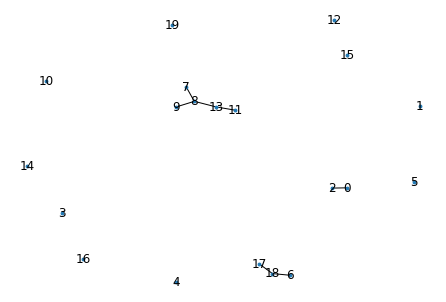

In [48]:
G = nx.erdos_renyi_graph(20,0.04)
nx.draw(G,with_labels=True,node_size=8)

In [49]:
connect(G)

[0, 1, 0, 2, 3, 4, 5, 6, 6, 6, 7, 6, 8, 6, 9, 10, 11, 5, 5, 12]

### Task 2: Degree distribution of classical random graphs

Define $f_k$ as the fraction of nodes in a graph with degree, $k$. Develop a computational experiment that compares $f_k$ and $p_k$ for $G_{Np}$ graphs. You should fix the expected degree to $<k>=4$ and focus on the influence of $N$. Your code should generate a few figures which illustrate one or two key trends.

In [53]:
from scipy.special import comb

k_bar = 4
b = []
# N : float
for N in range(10, 100):
    p = k_bar / N

    G = nx.erdos_renyi_graph(N, p)
    k = 1

    counter = 0
    for node in G.nodes:
        if G.degree(node) == k:
            counter += 1

    b.append(counter / N)

plt.figure()
plt.plot(range(10, 100), b)
plt.show()


f_k = 0.0
f_k = 0.09090909090909091
f_k = 0.08333333333333333
f_k = 0.0
f_k = 0.07142857142857142
f_k = 0.13333333333333333
f_k = 0.0625
f_k = 0.11764705882352941
f_k = 0.05555555555555555
f_k = 0.05263157894736842
f_k = 0.1
f_k = 0.09523809523809523
f_k = 0.13636363636363635
f_k = 0.0
f_k = 0.08333333333333333
f_k = 0.04
f_k = 0.038461538461538464
f_k = 0.1111111111111111
f_k = 0.03571428571428571
f_k = 0.10344827586206896
f_k = 0.0
f_k = 0.06451612903225806
f_k = 0.125
f_k = 0.12121212121212122
f_k = 0.029411764705882353
f_k = 0.05714285714285714
f_k = 0.027777777777777776
f_k = 0.05405405405405406
f_k = 0.0
f_k = 0.07692307692307693
f_k = 0.075
f_k = 0.07317073170731707
f_k = 0.21428571428571427
f_k = 0.13953488372093023
f_k = 0.022727272727272728
f_k = 0.06666666666666667
f_k = 0.08695652173913043
f_k = 0.06382978723404255
f_k = 0.125
f_k = 0.02040816326530612
f_k = 0.1
f_k = 0.09803921568627451
f_k = 0.15384615384615385
f_k = 0.018867924528301886
f_k = 0.07407407407407407
f_k = 0.

*Add discussion here*